In [1]:
import sys

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

from evaluation.deviations_evalaution_metrics import load_results, DeviationEvaluation

In [2]:
# Load deviation prediction results:
path_pred_deviations = "../2_conformance_prediction/results/Repair/deviation_predictions.pkl"

# Evaluation deviation labels

In [3]:
deviation_results_evaluation = load_results(path=path_pred_deviations)
eval = DeviationEvaluation(deviation_results=deviation_results_evaluation)

In [4]:
# Only evaluate labels that are in the target set!
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_dev()
print("Precision macro dev: ", precision_macro)
print("Precision macro dev per label: ", precision_per_label)
print("Recall macro dev: ", recall_macro)
print("Recall macro dev per label: ", recall_per_label)

Precision macro dev:  0.09336266777042394
Precision macro dev per label:  {('>>', 'ACKNOWLEDGEMENT'): 0.14624505928853754, ('>>', 'CREATE_INVOICE'): 0.002336448598130841, ('>>', 'QUALITY_CONTROL'): 0.005319148936170213, ('>>', 'REPAIR'): 0.0, ('>>', 'SHIPPING'): 0.006060606060606061, ('ACKNOWLEDGEMENT', '>>'): 0.26360338573155984, ('QUALITY_CONTROL', '>>'): 0.0967741935483871, ('REPAIR', '>>'): 0.2265625}
Recall macro dev:  0.730554404224617
Recall macro dev per label:  {('>>', 'ACKNOWLEDGEMENT'): 0.7474747474747475, ('>>', 'CREATE_INVOICE'): 1.0, ('>>', 'QUALITY_CONTROL'): 1.0, ('>>', 'REPAIR'): 0.0, ('>>', 'SHIPPING'): 1.0, ('ACKNOWLEDGEMENT', '>>'): 1.0, ('QUALITY_CONTROL', '>>'): 0.17142857142857143, ('REPAIR', '>>'): 0.925531914893617}


In [5]:
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_no_dev()
print("Precision macro no dev: ", precision_macro)
print("Precision macro per label no dev: ", precision_per_label)
print("Recall macro no dev: ", recall_macro)
print("Recall macro per label no dev: ", recall_per_label)

Precision macro no dev:  0.999024605443291
Precision macro per label no dev:  {('>>', 'ACKNOWLEDGEMENT'): 0.9975530977782128, ('>>', 'CREATE_INVOICE'): 1.0, ('>>', 'QUALITY_CONTROL'): 1.0, ('>>', 'REPAIR'): 0.9976652969742249, ('>>', 'SHIPPING'): 1.0, ('ACKNOWLEDGEMENT', '>>'): 1.0, ('QUALITY_CONTROL', '>>'): 0.9972798048963512, ('REPAIR', '>>'): 0.9996986438975389}
Recall macro no dev:  0.970729692611403
Recall macro per label no dev:  {('>>', 'ACKNOWLEDGEMENT'): 0.9593373493975904, ('>>', 'CREATE_INVOICE'): 0.9601753404215632, ('>>', 'QUALITY_CONTROL'): 0.9825592240253684, ('>>', 'REPAIR'): 0.998597868760516, ('>>', 'SHIPPING'): 0.9847043462040664, ('ACKNOWLEDGEMENT', '>>'): 0.9420276059019514, ('QUALITY_CONTROL', '>>'): 0.9947604790419161, ('REPAIR', '>>'): 0.9436753271382514}


# Evaluation sequences

In [6]:
# Evaluation of the deviaiton position

tgt_suffixes, pred_suffix_samples, (tgt_model_moves, tgt_log_moves), (pred_model_moves, pred_log_moves) = eval.get_suffix_devs()

case_level, per_label_mean, weighted_macro = eval.likelihood_at_target_positions(tgt_model_moves, tgt_log_moves, pred_model_moves, pred_log_moves)

print("macro-average mean likelihood log move: ", weighted_macro.get('log'))
print("macro-average mean likelihood log move: ", weighted_macro.get('model'))

macro-average mean likelihood log move:  0.0919954648526077
macro-average mean likelihood log move:  0.1052755905511811


/home/PSPLab/ProbabilisticSuffixPredictionLab/conformance_dev_and_pos_pred/src/notebooks/evaluation/../../evaluation/deviations_evalaution_metrics.py:426: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


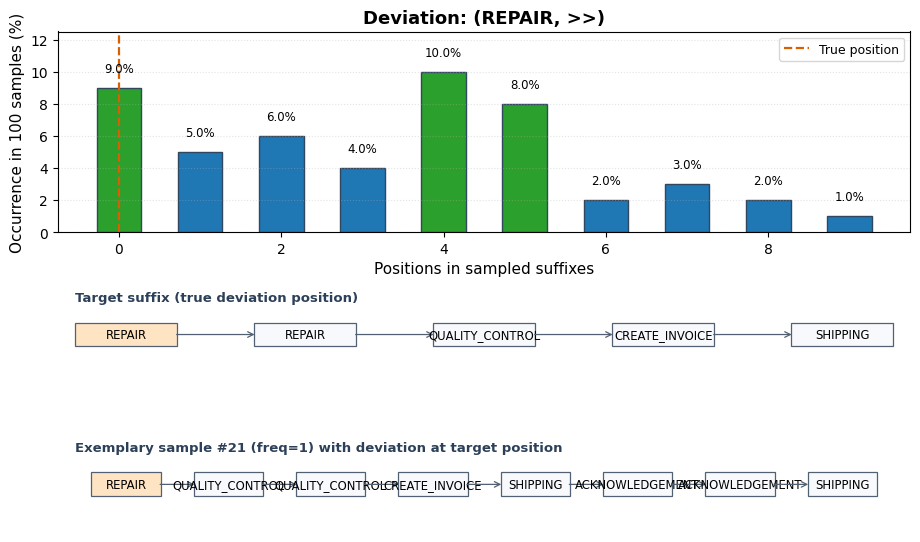

In [7]:
eval.plot_suffix_deviation_distribution(suffix_index=40,
                                        label='REPAIR',
                                        move='log',
                                        tgt_suff_move=tgt_log_moves,
                                        pred_suff_move=pred_log_moves,
                                        pred_suffix_samples=pred_suffix_samples,
                                        tgt_suffixes=tgt_suffixes)